In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def get_ecb_rate(month,requested_rate):
    
    web_page = requests.get("https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html")
    soup = BeautifulSoup(web_page.text, 'html.parser')

    
    # Extract interest rates from the table
    interest_rates = {}
    rate_name = None
    rate_col = None
    for row in soup.find('table').find_all('tr'):
        if rate_name == None:
            i=1 #set to 1 to match the table style
            for title in row.find_all('th'):
                if requested_rate.lower() in title.text.strip().lower() :
                    rate_name = title.text.strip()
                    rate_col = i
                    break
                i=i+1

        columns = row.find_all('td')
        if len(columns) >= 3 and month.lower() in columns[1].text.strip().lower() :
            rate_date = columns[1].text.strip()
            interest_rates[rate_date] = columns[rate_col].text.strip()
            break
    
    return interest_rates



def timed_ecb_event(event_date, month,rate):
    timer_interval = 1
    start_time = event_date - datetime.timedelta(seconds=5)  
    end_time = event_date + datetime.timedelta(minutes=3)
    ecb = None
    while datetime.datetime.now() < start_time:
        time.sleep(timer_interval)
    while datetime.datetime.now() < end_time:
    
        try :
            ecb = get_ecb_rate(month,rate)
  
            for scrap in ecb:
                # Print the interest rates
                print("Interest Rates (ECB) "+scrap+":  "+ ecb[scrap])
                    
                        
        except:
            print("Failed to catch the rate verify the name of the rate or if the table has changed")
            break
        if not ecb == None:
            break
        time.sleep(timer_interval)
 
timed_ecb_event(datetime.datetime.now(),'sep',"deposit")

    

Interest Rates (ECB) 20 Sep.:  4.00


C:\Users\Léa\AppData\Local\Temp\ipykernel_7096\2730347791.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interest_rates = pd.concat([interest_rates,new_row])
d:\Anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


           Date  Deposit_Facility  Main_Refi_Fixed_Rate  \
0  2023 20 Sep.              4.00                  4.50   
0   2023 2 Aug.              3.75                  4.25   
0  2023 21 Jun.              3.50                  4.00   
0   2023 10 May              3.25                  3.75   
0  2023 22 Mar.              3.00                  3.50   
0   2023 8 Feb.              2.50                  3.00   
0  2022 21 Dec.              2.00                  2.50   
0   2022 2 Nov.              1.50                  2.00   
0  2022 14 Sep.              0.75                  1.25   
0  2022 27 Jul.              0.00                  0.50   
0  2019 18 Sep.             -0.50                  0.00   
0  2016 16 Mar.             -0.40                  0.00   
0   2015 9 Dec.             -0.30                  0.05   
0  2014 10 Sep.             -0.20                  0.05   
0       11 Jun.             -0.10                  0.15   
0  2013 13 Nov.              0.00                  0.25 

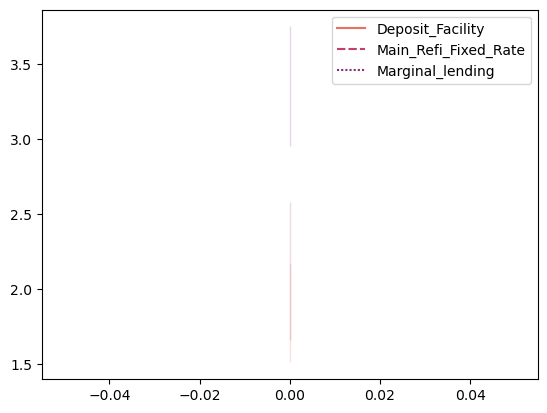

In [7]:

    
def ecb_tab():
   web_page = requests.get("https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html")
   soup = BeautifulSoup(web_page.text, 'html.parser')
   # Extract interest rates from the table
   interest_rates = pd.DataFrame(columns=['Date','Deposit_Facility','Main_Refi_Fixed_Rate','Main_Variable_Fixed_Rate','Marginal_lending'])
   for row in soup.find('table').find_all('tr'):
        columns = row.find_all('td')
        if len(columns) >= 3:
             refi_fixed = None
             refi_variable= None

             if not columns[3].text.strip() == '-':
                refi_fixed = float(columns[3].text.strip().replace('−','-'))
                         
             if not columns[4].text.strip() == '-':
                refi_variable = float(columns[4].text.strip().replace('−','-'))
               
             new_row = pd.DataFrame({'Date':columns[0].text.strip()+" "+columns[1].text.strip(),
                                              'Deposit_Facility':float(columns[2].text.strip().replace('−','-')),
                                              'Main_Refi_Fixed_Rate':refi_fixed,
                                              'Main_Variable_Fixed_Rate':refi_variable,
                                              'Marginal_lending':float(columns[5].text.strip().replace('−','-'))}, index=[0])
            
             interest_rates = pd.concat([interest_rates,new_row])
   print(interest_rates)
   #rc={'axes.facecolor': '#1f1f1f'}
   #sns.lineplot(data=interest_rates[['Deposit_Facility', 'Main_Refi_Fixed_Rate', 'Marginal_lending']], palette="flare")         


ecb_tab()